In [1]:
import numpy as np
import pandas as pd

In [2]:
import pypsa

In [3]:
S_default=1 # MVA

S_base=100 # MVA
V_base=345 # kV

Z_base=(V_base**2)/S_base # Ohm

In [4]:
lines = pd.read_csv("working/39_bus/Lines.csv")
generators = pd.read_csv("working/39_bus/Generators.csv")
loads = pd.read_csv("working/39_bus/Loads.csv")
transformers = pd.read_csv("working/39_bus/Transformers.csv")

In [5]:
# use lines, generators, loads, transformers to generate a buses dataframe
bus_ids = np.concatenate([
    lines["From Bus"].unique(),
    lines["To Bus"].unique(),
    transformers["From Bus"].unique(),
    transformers["To Bus"].unique(),
])

# build buses dataframe with "Bus X" naming
buses = pd.DataFrame({
    "Bus": np.unique(np.array([f"Bus {b}" for b in bus_ids]))
})

# Merge generator info into buses
buses = buses.merge(generators[["Bus", "Bus Type", "V in p.u."]].drop_duplicates(subset=["Bus"]), on="Bus", how="left")
buses.loc[buses["V in p.u."].isnull(), "V in p.u."] = 1.000

# Any bus that appears in loads but has no Bus Type should be PQ
buses.loc[buses["Bus"].isin(loads["Bus"]) & buses["Bus Type"].isnull(), "Bus Type"] = "PQ"
buses.loc[buses["Bus Type"].isnull(), "Bus Type"] = "PQ"

# Assign Nominal Voltage
conditions = [
    buses["Bus"] == "Bus 12",
    buses["Bus"] == "Bus 20",
    buses["Bus"].isin([f"Bus {i}" for i in range(30, 39)])
]
choices = [138, 230, 16.5]
buses["Nominal Voltage"] = np.select(conditions, choices, default=345)

buses

,Bus,Bus Type,V in p.u.,Nominal Voltage
0,Bus 1,PQ,1.0000,345.0
1,Bus 10,PQ,1.0000,345.0
2,Bus 11,PQ,1.0000,345.0
3,Bus 12,PQ,1.0000,138.0
4,Bus 13,PQ,1.0000,345.0
5,Bus 14,PQ,1.0000,345.0
6,Bus 15,PQ,1.0000,345.0
7,Bus 16,PQ,1.0000,345.0
8,Bus 17,PQ,1.0000,345.0
9,Bus 18,PQ,1.0000,345.0


In [6]:
# del(grid)

In [7]:
grid = pypsa.Network(name="39 Bus New England System")

In [8]:
for idx, rows in buses.iterrows():
    grid.add("Bus", rows["Bus"], v_nom=rows["Nominal Voltage"], v_mag_pu_set= rows["V in p.u."], control=rows["Bus Type"])

grid.buses

,v_nom,type,x,y,carrier,unit,location,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network
name,,,,,,,,,,,,,
Bus 1,345.0,,0.0,0.0,AC,,,1.0000,0.0,inf,PQ,,
Bus 10,345.0,,0.0,0.0,AC,,,1.0000,0.0,inf,PQ,,
Bus 11,345.0,,0.0,0.0,AC,,,1.0000,0.0,inf,PQ,,
Bus 12,138.0,,0.0,0.0,AC,,,1.0000,0.0,inf,PQ,,
Bus 13,345.0,,0.0,0.0,AC,,,1.0000,0.0,inf,PQ,,
Bus 14,345.0,,0.0,0.0,AC,,,1.0000,0.0,inf,PQ,,
Bus 15,345.0,,0.0,0.0,AC,,,1.0000,0.0,inf,PQ,,
Bus 16,345.0,,0.0,0.0,AC,,,1.0000,0.0,inf,PQ,,
Bus 17,345.0,,0.0,0.0,AC,,,1.0000,0.0,inf,PQ,,


In [9]:
for idx, rows in lines.iterrows():
    grid.add("Line", f"Line {int(rows["From Bus"])}-{int(rows["To Bus"])}", bus0=f"Bus {int(rows["From Bus"])}", bus1=f"Bus {int(rows["To Bus"])}", r=rows["R in p.u."]*(V_base**2), x=rows["X in p.u."]*(V_base**2), b=rows["B in p.u."]/(V_base**2))

grid.lines

,bus0,bus1,type,x,r,g,b,s_nom,s_nom_mod,s_nom_extendable,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
name,,,,,,,,,,,,,,,,,,,,,
Line 1-2,Bus 1,Bus 2,,4891.9275,416.5875,0.0,5.870195e-06,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line 1-39,Bus 1,Bus 39,,2975.6250,119.0250,0.0,6.301197e-06,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line 2-3,Bus 2,Bus 3,,1797.2775,154.7325,0.0,2.160891e-06,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line 2-25,Bus 2,Bus 25,,1023.6150,833.1750,0.0,1.226633e-06,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line 3-4,Bus 3,Bus 4,,2535.2325,154.7325,0.0,1.860113e-06,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line 3-18,Bus 3,Bus 18,,1583.0325,130.9275,0.0,1.796261e-06,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line 4-5,Bus 4,Bus 5,,1523.5200,95.2200,0.0,1.127494e-06,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line 4-14,Bus 4,Bus 14,,1535.4225,95.2200,0.0,1.161101e-06,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line 5-6,Bus 5,Bus 6,,309.4650,23.8050,0.0,3.646293e-07,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
for idx, rows in generators.iterrows():
    grid.add("Generator", rows["Generator"], bus=rows["Bus"], control=rows["Bus Type"], p_set=rows["P in MW"]/S_base)

grid.generators

,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_nom_set,p_min_pu,...,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
name,,,,,,,,,,,,,,,,,,,,,
G 01,Bus 39,PV,,0.0,0.0,False,0.0,inf,NaN,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
G 02,Bus 31,Slack,,0.0,0.0,False,0.0,inf,NaN,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
G 03,Bus 32,PV,,0.0,0.0,False,0.0,inf,NaN,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
G 04,Bus 33,PV,,0.0,0.0,False,0.0,inf,NaN,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
G 05,Bus 34,PV,,0.0,0.0,False,0.0,inf,NaN,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
G 06,Bus 35,PV,,0.0,0.0,False,0.0,inf,NaN,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
G 07,Bus 36,PV,,0.0,0.0,False,0.0,inf,NaN,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
G 08,Bus 37,PV,,0.0,0.0,False,0.0,inf,NaN,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
G 09,Bus 38,PV,,0.0,0.0,False,0.0,inf,NaN,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


In [11]:
for idx, rows in loads.iterrows():
    grid.add("Load", rows["Load"], bus=rows["Bus"], p_set=rows["P in MW"]/S_base, q_set=rows["Q in Mvar"]/S_base)

grid.loads

,bus,carrier,type,p_set,q_set,sign,active
name,,,,,,,
Load 3,Bus 3,,,3.220,0.024,-1.0,True
Load 4,Bus 4,,,5.000,1.840,-1.0,True
Load 7,Bus 7,,,2.338,0.840,-1.0,True
Load 8,Bus 8,,,5.220,1.760,-1.0,True
Load 12,Bus 12,,,0.075,0.880,-1.0,True
Load 15,Bus 15,,,3.200,1.530,-1.0,True
Load 16,Bus 16,,,3.290,0.323,-1.0,True
Load 18,Bus 18,,,1.580,0.300,-1.0,True
Load 20,Bus 20,,,6.280,1.030,-1.0,True


In [ ]:
for idx, rows in transformers.iterrows():
    grid.add("Transformer", f"Transformer {int(rows["From Bus"])}-{int(rows["To Bus"])}", bus0=f"Bus {int(rows["From Bus"])}", bus1=f"Bus {int(rows["To Bus"])}", r=rows["R in p.u."], x=rows["X in p.u."], tap_ratio=rows["Transformer Tap Magnitude in p.u."], phase_shift=rows["Transformer Tap Angle in deg"], s_nom=S_default)

grid.transformers

,bus0,bus1,type,model,x,r,g,b,s_nom,s_nom_mod,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
name,,,,,,,,,,,,,,,,,,,,,
Transformer 12-11,Bus 12,Bus 11,,t,0.0435,0.0016,0.0,0.0,1.0,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Transformer 12-13,Bus 12,Bus 13,,t,0.0435,0.0016,0.0,0.0,1.0,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Transformer 6-31,Bus 6,Bus 31,,t,0.0250,0.0000,0.0,0.0,1.0,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Transformer 10-32,Bus 10,Bus 32,,t,0.0200,0.0000,0.0,0.0,1.0,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Transformer 19-33,Bus 19,Bus 33,,t,0.0142,0.0007,0.0,0.0,1.0,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Transformer 20-34,Bus 20,Bus 34,,t,0.0180,0.0009,0.0,0.0,1.0,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Transformer 22-35,Bus 22,Bus 35,,t,0.0143,0.0000,0.0,0.0,1.0,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Transformer 23-36,Bus 23,Bus 36,,t,0.0272,0.0005,0.0,0.0,1.0,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Transformer 25-37,Bus 25,Bus 37,,t,0.0232,0.0006,0.0,0.0,1.0,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
grid.lpf()
grid.pf(use_seed=True)

INFO:pypsa.network.power_flow:Performing linear load-flow on AC sub-network <pypsa.networks.SubNetwork object at 0x000001CEAD964FE0> for snapshot(s) Index(['now'], dtype='object', name='snapshot')
INFO:pypsa.network.power_flow:Performing non-linear load-flow on AC sub-network <pypsa.networks.SubNetwork object at 0x000001CEAD965550> for snapshots Index(['now'], dtype='object', name='snapshot')


{'n_iter': name      0
 snapshot   
 now       3,
 'error': name                 0
 snapshot              
 now       3.608894e-08,
 'converged': name         0
 snapshot      
 now       True}

In [14]:
grid.branches()

active             b    b_pu  build_year  \
component   name                                                          
Transformer Transformer 12-11    True  0.000000e+00  0.0000           0   
            Transformer 12-13    True  0.000000e+00  0.0000           0   
            Transformer 6-31     True  0.000000e+00  0.0000           0   
            Transformer 10-32    True  0.000000e+00  0.0000           0   
            Transformer 19-33    True  0.000000e+00  0.0000           0   
            Transformer 20-34    True  0.000000e+00  0.0000           0   
            Transformer 22-35    True  0.000000e+00  0.0000           0   
            Transformer 23-36    True  0.000000e+00  0.0000           0   
            Transformer 25-37    True  0.000000e+00  0.0000           0   
            Transformer 2-30     True  0.000000e+00  0.0000           0   
            Transformer 29-38    True  0.000000e+00  0.0000           0   
            Transformer 19-20    True  0.000000e+00  0.0000           0   
Line        Line 1-2             True  5.870195e-06  0.6987           0   
            Line 1-39            True  6.301197e-06  0.7500           0   
            Line 2-3             True  2.160891e-06  0.2572           0   
            Line 2-25            True  1.226633e-06  0.1460           0   
            Line 3-4             True  1.860113e-06  0.2214           0   
            Line 3-18            True  1.796261e-06  0.2138           0   
            Line 4-5             True  1.127494e-06  0.1342           0   
            Line 4-14            True  1.161101e-06  0.1382           0   
            Line 5-6             True  3.646293e-07  0.0434           0   
            Line 5-8             True  1.240076e-06  0.1476           0   
            Line 6-7             True  9.493804e-07  0.1130           0   
            Line 6-11            True  1.166982e-06  0.1389           0   
            Line 7-8             True  6.553245e-07  0.0780           0   
            Line 8-9             True  3.195967e-06  0.3804           0   
            Line 9-39            True  1.008192e-05  1.2000           0   
            Line 10-11           True  6.124764e-07  0.0729           0   
            Line 10-13           True  6.124764e-07  0.0729           0   
            Line 13-14           True  1.447595e-06  0.1723           0   
            Line 14-15           True  3.074984e-06  0.3660           0   
            Line 15-16           True  1.436673e-06  0.1710           0   
            Line 16-17           True  1.127494e-06  0.1342           0   
            Line 16-19           True  2.554085e-06  0.3040           0   
            Line 16-21           True  2.140727e-06  0.2548           0   
            Line 16-24           True  5.713085e-07  0.0680           0   
            Line 17-18           True  1.108171e-06  0.1319           0   
            Line 17-27           True  2.701953e-06  0.3216           0   
            Line 21-22           True  2.155009e-06  0.2565           0   
            Line 22-23           True  1.550935e-06  0.1846           0   
            Line 23-24           True  3.032976e-06  0.3610           0   
            Line 25-26           True  4.310019e-06  0.5130           0   
            Line 26-27           True  2.013022e-06  0.2396           0   
            Line 26-28           True  6.554925e-06  0.7802           0   
            Line 26-29           True  8.645243e-06  1.0290           0   
            Line 28-29           True  2.091997e-06  0.2490           0   

                                 bus0    bus1  capital_cost carrier  \
component   name                                                      
Transformer Transformer 12-11  Bus 12  Bus 11           0.0     NaN   
            Transformer 12-13  Bus 12  Bus 13           0.0     NaN   
            Transformer 6-31    Bus 6  Bus 31           0.0     NaN   
            Transformer 10-32  Bus 10  Bus 32           0.0     NaN   
    

In [15]:
grid.generators_t.p

name,G 01,G 02,G 03,G 04,G 05,G 06,G 07,G 08,G 09,G 10
snapshot,,,,,,,,,,
now,10.0,5.208111,6.5,6.32,5.08,6.5,5.6,5.4,8.3,2.5


In [16]:
grid.generators_t.q

name,G 01,G 02,G 03,G 04,G 05,G 06,G 07,G 08,G 09,G 10
snapshot,,,,,,,,,,
now,0.882817,1.982518,2.051444,1.099059,1.657636,2.124121,1.011749,0.004399,0.228413,1.461579


In [17]:
grid.loads_t.p, grid.loads_t.q

(name      Load 3  Load 4  Load 7  Load 8  Load 12  Load 15  Load 16  Load 18  \
 snapshot                                                                       
 now         3.22     5.0   2.338    5.22    0.075      3.2     3.29     1.58   
 
 name      Load 20  Load 21  Load 23  Load 24  Load 25  Load 26  Load 27  \
 snapshot                                                                  
 now          6.28     2.74    2.475    3.086     2.24     1.39     2.81   
 
 name      Load 28  Load 29  Load 31  Load 39  
 snapshot                                      
 now          2.06    2.835    0.092    11.04  ,
 name      Load 3  Load 4  Load 7  Load 8  Load 12  Load 15  Load 16  Load 18  \
 snapshot                                                                       
 now        0.024    1.84    0.84    1.76     0.88     1.53    0.323      0.3   
 
 name      Load 20  Load 21  Load 23  Load 24  Load 25  Load 26  Load 27  \
 snapshot                                                  

In [18]:
grid.buses_t.p

name,Bus 1,Bus 10,Bus 11,Bus 12,Bus 13,Bus 14,Bus 15,Bus 16,Bus 17,Bus 18,...,Bus 36,Bus 37,Bus 38,Bus 39,Bus 4,Bus 5,Bus 6,Bus 7,Bus 8,Bus 9
snapshot,,,,,,,,,,,,,,,,,,,,,
now,0.0,0.0,0.0,-0.075,0.0,0.0,-3.2,-3.29,0.0,-1.58,...,5.6,5.4,8.3,-1.04,-5.0,0.0,0.0,-2.338,-5.22,0.0


In [19]:
grid.buses_t.q

name,Bus 1,Bus 10,Bus 11,Bus 12,Bus 13,Bus 14,Bus 15,Bus 16,Bus 17,Bus 18,...,Bus 36,Bus 37,Bus 38,Bus 39,Bus 4,Bus 5,Bus 6,Bus 7,Bus 8,Bus 9
snapshot,,,,,,,,,,,,,,,,,,,,,
now,0.0,0.0,0.0,-0.88,0.0,0.0,-1.53,-0.323,0.0,-0.3,...,1.011749,0.004399,0.228413,-1.617183,-1.84,0.0,0.0,-0.84,-1.76,0.0


In [20]:
grid.buses_t.v_mag_pu

name,Bus 1,Bus 10,Bus 11,Bus 12,Bus 13,Bus 14,Bus 15,Bus 16,Bus 17,Bus 18,...,Bus 36,Bus 37,Bus 38,Bus 39,Bus 4,Bus 5,Bus 6,Bus 7,Bus 8,Bus 9
snapshot,,,,,,,,,,,,,,,,,,,,,
now,1.047356,1.017151,1.012694,1.000151,1.014307,1.011733,1.015384,1.031774,1.033555,1.030931,...,1.0635,1.0278,1.0265,1.03,1.003863,1.005311,1.007672,0.997001,0.99602,1.028226


In [21]:
grid.buses_t.v_ang * 180 / np.pi

name,Bus 1,Bus 10,Bus 11,Bus 12,Bus 13,Bus 14,Bus 15,Bus 16,Bus 17,Bus 18,...,Bus 36,Bus 37,Bus 38,Bus 39,Bus 4,Bus 5,Bus 6,Bus 7,Bus 8,Bus 9
snapshot,,,,,,,,,,,,,,,,,,,,,
now,-8.438685,-5.427126,-6.284262,-6.243642,-6.097718,-7.656411,-7.736092,-6.187509,-7.301285,-8.223858,...,8.322916,2.421105,7.807725,-10.052961,-9.606667,-8.611863,-7.949683,-10.123823,-10.615381,-10.321986


{'nodes': {'Bus': <matplotlib.collections.PatchCollection at 0x1ceb5caa120>},
 'branches': {'Line': <matplotlib.collections.LineCollection at 0x1ceb5cdbf50>,
  'Transformer': <matplotlib.collections.LineCollection at 0x1ceb5cf4d70>},
 'flows': {}}

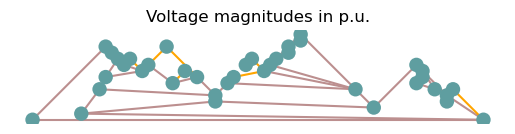

In [22]:
grid.plot(bus_sizes=1e-3, title="Voltage magnitudes in p.u.")

In [23]:
now = grid.snapshots[0]

angle_diff = pd.Series(grid.buses_t.v_ang.loc[now,grid.lines.bus0].values -
                       grid.buses_t.v_ang.loc[now,grid.lines.bus1].values,
                       index=grid.lines.index)

(angle_diff*180/np.pi).describe()

count    34.000000
mean     -0.326904
std       2.475445
min      -6.271079
25%      -1.636211
50%      -0.019960
75%       1.087362
max       6.537935
dtype: float64